In [1172]:
import pandas as pd
import numpy as np
import os
import missingno as msno

## Manejo de archivos simplificado

In [1173]:
# Maenejo simplificado de archivos
files = os.listdir('./Datasets_clean/')
files = [ file for file in files if not(file.endswith('.pdf'))  ]
dict_files = {'df{}'.format(i+1): file for i, file in enumerate(files)}

In [1174]:
dict_files

{'df1': 'Alternative Fuel Vehicles US.csv',
 'df2': 'ElectricCarData_Clean.csv',
 'df3': 'Electric_and_Alternative_Fuel_Charging_Stations.csv',
 'df4': 'Light Duty Vehicles.csv',
 'df5': 'taxi+_zone_lookup.csv',
 'df6': 'taxi_zones.csv',
 'df7': 'Vehicle Fuel Economy Data.csv',
 'df8': 'weather.csv'}

# Se abrirán los archivos relacionados en tema vehiculos, según el der y se normalizaran datos y nombres de columnas, a modo de obtener los datos coherentes  y congruentes entres si.

### Archivo 'Light Duty Vehicles.csv'

Este archivo aparenta ser el más completo, a su vez, podemos extraer las tablas de marcas por sus id, asi como las de fuel configuration, category, etc.

In [1175]:
dict_files['df4']

'Light Duty Vehicles.csv'

In [1176]:
df4 = pd.read_csv('./Datasets_clean/' + dict_files['df4']) 
df4.head()

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Conventional Fuel Economy City,...,Engine Size,Engine Description,Manufacturer,Category,Fuel Code,Fuel,Fuel Configuration Name,Electric-Only Range,PHEV Type,Drivetrain
0,13044,45,9.0,365,27,NSX,2022,NaN,NaN,21.0,...,3.5L,3.5L V6,Acura,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,AWD
1,12854,45,9.0,377,27,A3,2022,NaN,NaN,29.0,...,2.0L,2.0L I4,Audi,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,FWD
2,12842,45,9.0,377,27,A3 quattro,2022,NaN,NaN,28.0,...,2.0L,2.0L I4,Audi,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,AWD
3,12783,45,9.0,377,27,A4 allroad quattro,2022,NaN,NaN,24.0,...,2.0L,2.0L I4,Audi,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,AWD
4,12782,45,9.0,377,27,A4 quattro,2022,NaN,NaN,26.0,...,2.0L,2.0L I4,Audi,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,AWD


In [1177]:
df4.columns

Index(['Vehicle ID', 'Fuel ID', 'Fuel Configuration ID', 'Manufacturer ID',
       'Category ID', 'Model', 'Model Year', 'Alternative Fuel Economy City',
       'Alternative Fuel Economy Highway', 'Conventional Fuel Economy City',
       'Conventional Fuel Economy Highway',
       'Conventional Fuel Economy Combined', 'Transmission Type',
       'Engine Type', 'Engine Size', 'Engine Description', 'Manufacturer',
       'Category', 'Fuel Code', 'Fuel', 'Fuel Configuration Name',
       'Electric-Only Range', 'PHEV Type', 'Drivetrain'],
      dtype='object')

<Axes: >

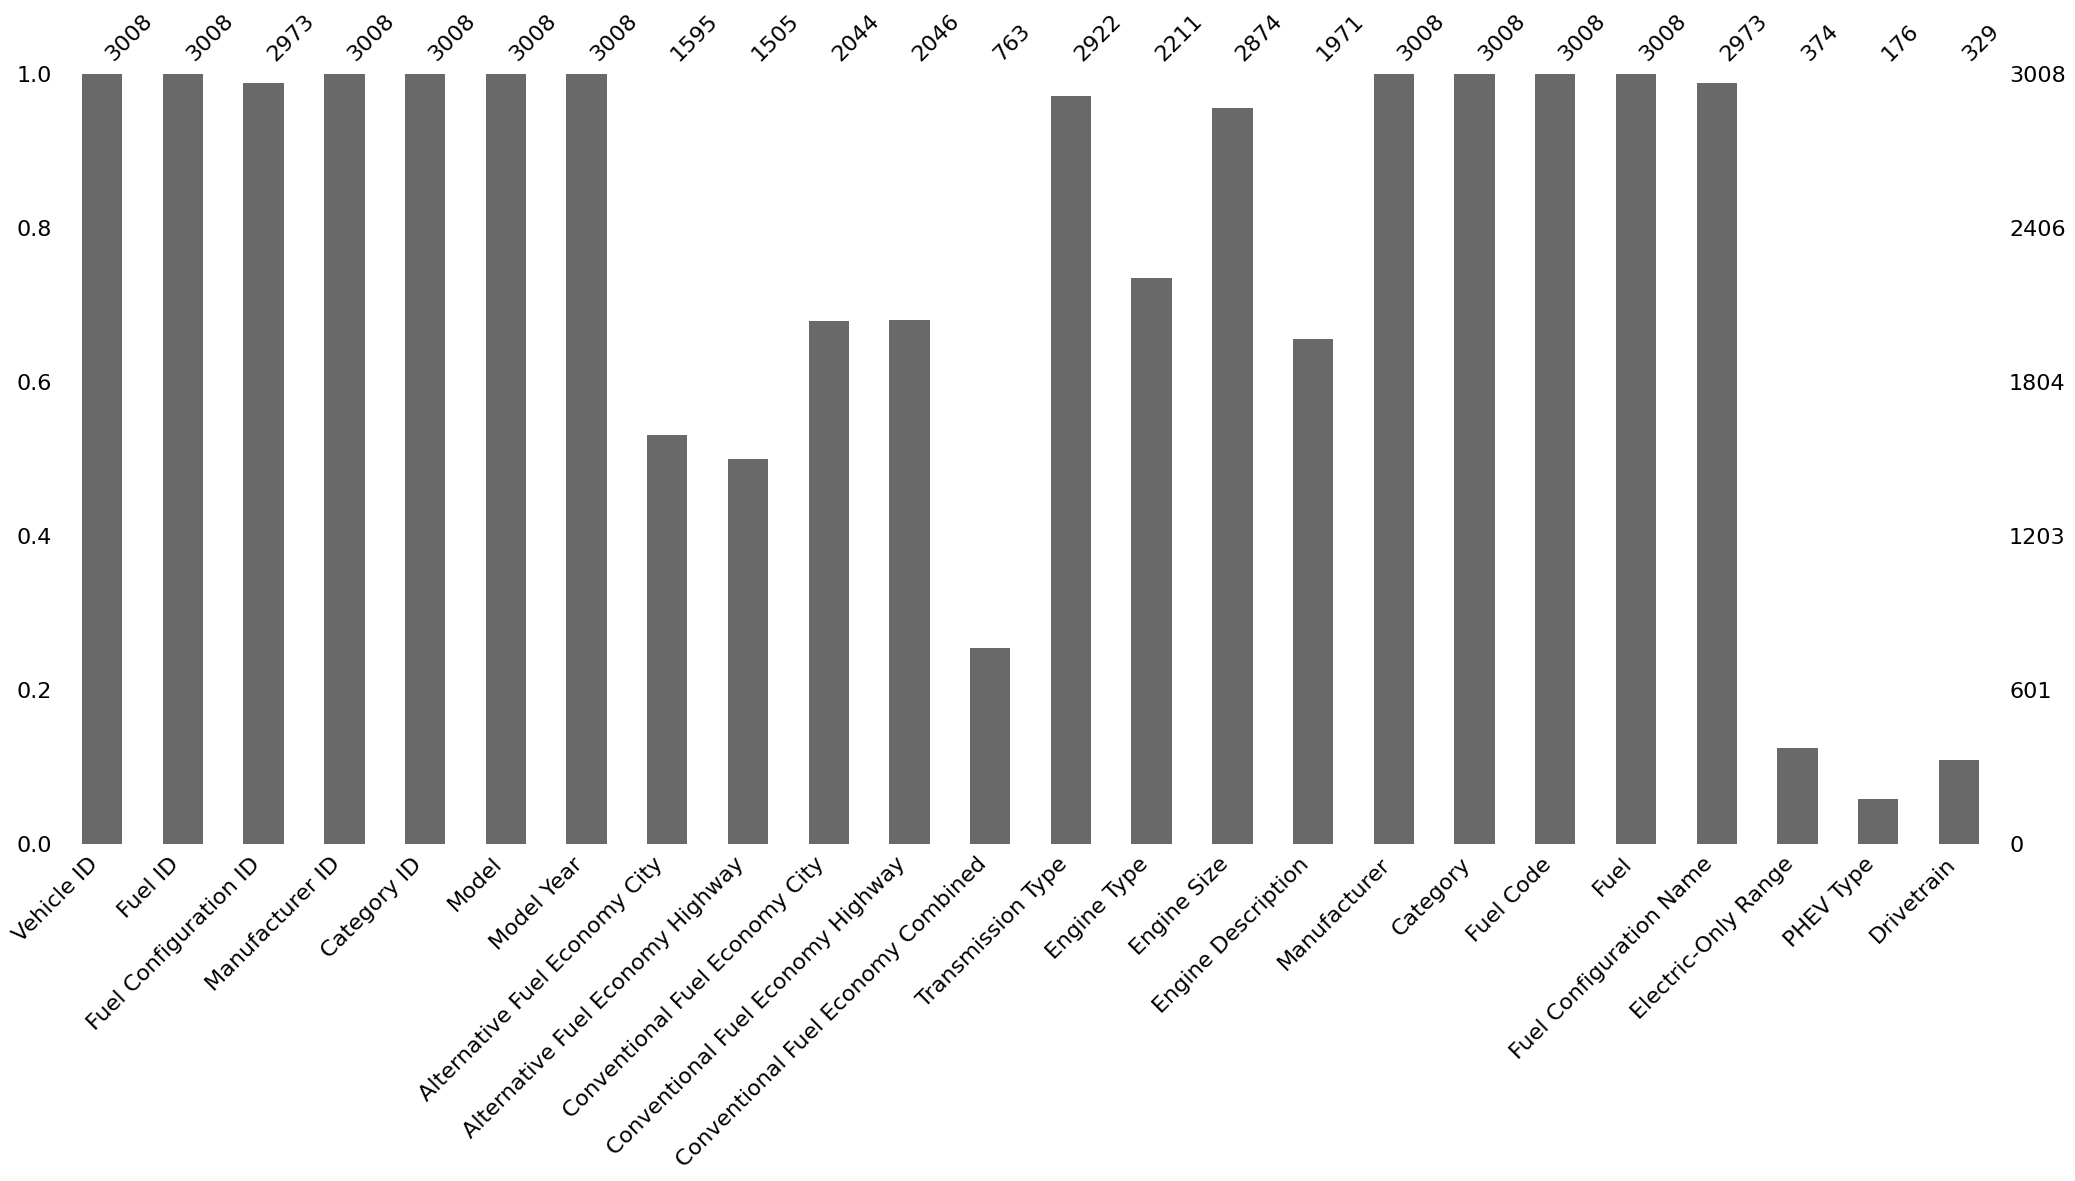

In [1178]:
msno.bar(df4)

Para normalizar de manera correcta, me deshago de los campos Id que no posean valores, que son pocos. En este caso es solo Fuel Configuration ID. Además el Vehicle ID no aporta mucho y puede ser reemplazado posteriormente. 

In [1179]:
df4.dropna(subset=['Fuel Configuration ID', 'Vehicle ID'], inplace=True)

#### Normalizar Fuel

In [1180]:
fuels = df4[['Fuel ID', 'Fuel', 'Fuel Code']].drop_duplicates().reset_index(drop=True)
fuels.head()

,Fuel ID,Fuel,Fuel Code
0,45,Hybrid Electric,HYBR
1,57,Plug-in Hybrid Electric,PHEV
2,41,Electric,ELEC
3,35,Biodiesel (B20),BD
4,11,Ethanol (E85),E85_GSLN


In [1181]:
df4.drop(columns=['Fuel', 'Fuel Code'], inplace=True)

##### Normalizar Fuel Configuration

In [1182]:
fuel_configuration = df4[['Fuel Configuration ID', 'Fuel Configuration Name']].drop_duplicates().reset_index(drop=True)
fuel_configuration.nunique()

Fuel Configuration ID      5
Fuel Configuration Name    5
dtype: int64

In [1183]:
df4.drop(columns=['Fuel Configuration Name'], inplace=True)

#### Normalizar Manufacturer

In [1184]:
manufacturer = df4[['Manufacturer ID', 'Manufacturer']].drop_duplicates().reset_index(drop=True)
manufacturer.nunique()

Manufacturer ID    55
Manufacturer       55
dtype: int64

In [1185]:
manufacturer['Manufacturer'] = manufacturer['Manufacturer'].apply(lambda x: x.strip().upper())

In [1186]:
df4.drop(columns=['Manufacturer'], inplace=True)

#### Normalizar Category

In [1187]:
category = df4[['Category ID', 'Category']].drop_duplicates().reset_index(drop=True)
category.nunique()

Category ID    6
Category       6
dtype: int64

In [1188]:
df4.drop(columns=['Category'], inplace=True)

**Se tiene un archivo bastante completo y normalizado en donde se puede. Se espera cruzar los datos con otras fuentes e ir mejorando la calidad del dato**

#### Normalizamos Transmission type

En terminos de coherencia y simpleza de los datos tendremos automatic y manual, si es compartida se mantendrá automatic. Dado que en esta data es engorroso, se descarta esta columna y se obtendrá de otras fuentes o tablas.

In [1189]:
df4['Transmission Type'].unique()

array(['Auto', nan, 'Manual', 'ECVT', 'Auto / Man', 'Automatic / 6 speed',
       'Semi-Automatic', 'Automatic / 4 speed', 'Automatic',
       'Automatic / 1 speed', 'Automatic / 5 speed', '6 speed Automatic',
       'CVT', 'Manual / 6 speed', '3 mode / 1 speed',
       'Automatic / 7 speed', 'ECVT / 8 speed', 'Automatic / Variable',
       'Automatic / 8 speed', 'Manual / 5 speed', '5-Speed Automatic',
       'V6, Hybrid, 3.5L', 'Automatic CVT', 'Continuously Variable',
       '4-speed automatic', '6-speed automatic', 'Variable automatic',
       '5-speed automatic', 'Automatic EVT', 'SOHC', 'Direct Drive',
       '7-speed automatic', 'Multispeed automatic', '6-speed manual',
       '4 speed automatic', '5 Speed Automatic', '4-speed automatic,',
       'Manual 5-Speed or CVT', '5-speed auto with o/d',
       'Automatic (CVT)', 'electronic, 4-speed automatic',
       'electronic 4-speed automatic', '4-speed automatic, overdrive',
       'Single-speed automatic', '4-speed auto or 5 spee

In [1190]:
# Definir una función para normalizar los valores específicos
def normalize_transmission(transmission):
    if pd.isna(transmission):
        return np.nan
    
    transmission_lower = transmission.lower()
    if any(keyword in transmission_lower for keyword in ['auto', 'automatic', 'cvt', 'direct', 'single', 'a/t']):
        return 'Automatic'
    elif any(keyword in transmission_lower for keyword in ['manual', 'man']):
        return 'Manual'
    else:
        return np.nan

In [1191]:
# Aplicar la función a la columna en cuestión
df4['Transmission Type'] = df4['Transmission Type'].apply(normalize_transmission)

In [1192]:
df4['Transmission Type'].unique()

array(['Automatic', nan, 'Manual'], dtype=object)

## Teniendo en cuenta este archivo, su nombre de columnas y campos, se manejaran el resto de archivos relacionados a vehiculos.

### Archivo 'Alternative Fuel Vehicles US.csv'

In [1193]:
dict_files['df1']

'Alternative Fuel Vehicles US.csv'

In [1194]:
df1 = pd.read_csv('./Datasets_clean/' + dict_files['df1']) 
df1.head()

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,Alternative Fuel Economy Combined,Conventional Fuel Economy Combined,Transmission Type,Engine Size
0,Sedan/Wagon,NSX,2022,Acura,Hybrid Electric,NaN,NaN,21.0,Automatic,3.5L
1,Sedan/Wagon,A3,2022,Audi,Hybrid Electric,NaN,NaN,32.0,Automatic,2.0L
2,Sedan/Wagon,A3 quattro,2022,Audi,Hybrid Electric,NaN,NaN,31.0,Automatic,2.0L
3,Sedan/Wagon,A4 allroad quattro,2022,Audi,Hybrid Electric,NaN,NaN,26.0,Automatic,2.0L
4,Sedan/Wagon,A4 quattro,2022,Audi,Hybrid Electric,NaN,NaN,29.0,Automatic,2.0L


In [1195]:
df4.columns

Index(['Vehicle ID', 'Fuel ID', 'Fuel Configuration ID', 'Manufacturer ID',
       'Category ID', 'Model', 'Model Year', 'Alternative Fuel Economy City',
       'Alternative Fuel Economy Highway', 'Conventional Fuel Economy City',
       'Conventional Fuel Economy Highway',
       'Conventional Fuel Economy Combined', 'Transmission Type',
       'Engine Type', 'Engine Size', 'Engine Description',
       'Electric-Only Range', 'PHEV Type', 'Drivetrain'],
      dtype='object')

#### Normalizamos Manufacturer, ahora se tiene la tabla Manufacturer de la tabla anterior

In [1196]:
df1['Manufacturer'] = df1['Manufacturer'].apply(lambda x: x.strip().upper())

In [1197]:
# Crear un diccionario de mapeo de Manufacturer ID a Manufacturer
manufacturer_mapping = manufacturer.set_index('Manufacturer')['Manufacturer ID'].to_dict()

# Mapear los Manufacturer ID a los nombres de fabricantes en el DataFrame original
df1['Manufacturer ID'] = df1['Manufacturer'].map(manufacturer_mapping)

In [1198]:
df1['Manufacturer ID'].unique()

array([365, 377, 355, 211, 231, 215, 223, 409, 219, 213, 209, 351, 385,
       275, 361, 387, 243, 227, 469, 229, 239, 425, 263, 217, 462, 391,
       349, 470, 237, 221, 347, 395, 466, 424, 383], dtype=int64)

Quedo perfecto, descartamos la columna Manufacturer

In [1199]:
df1.drop(columns=['Manufacturer'], inplace=True)

#### Normalizamos Category, ahora se tiene la tabla Category de la tabla anterior

In [1200]:
# Crear un diccionario de mapeo de Manufacturer ID a Manufacturer
category_mapping = category.set_index('Category')['Category ID'].to_dict()

# Mapear los Manufacturer ID a los nombres de fabricantes en el DataFrame original
df1['Category ID'] = df1['Category'].map(category_mapping)

In [1201]:
df1['Category ID'].unique()

array([27, 29, 25,  9,  3], dtype=int64)

Quedo perfecto, descartamos la columna category

In [1202]:
df1.drop(columns=['Category'], inplace=True)

#### Normalizamos Fuel, ahora se tiene la tabla fuel de la tabla anterior

In [1203]:
# Crear un diccionario de mapeo de Manufacturer ID a Manufacturer
fuel_mapping = fuels.set_index('Fuel')['Fuel ID'].to_dict()

# Mapear los Manufacturer ID a los nombres de fabricantes en el DataFrame original
df1['Fuel ID'] = df1['Fuel'].map(fuel_mapping)

In [1204]:
df1['Fuel ID'].unique()

array([45, 57, 41, 35, 11,  9], dtype=int64)

Quedo perfecto, descartamos la columna Fuel

In [1205]:
df1.drop(columns=['Fuel'], inplace=True)

#### Normalizamos Transmission Type

In [1206]:
df1['Transmission Type'].unique()

array(['Automatic', nan], dtype=object)

Se mantiene correcto en termino de lo anterior, posteriormente se cruzaran con más tablas de ser necesarios.

### Archivo 'ElectricCarData_Clean.csv'

In [1207]:
dict_files['df2']

'ElectricCarData_Clean.csv'

In [1208]:
df2 = pd.read_csv('./Datasets_clean/' + dict_files['df2']) 
df2.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


Primero cambiamos los nombres de las columnas previo a trabajarlas.

In [1209]:
df2.rename(columns={'Brand': 'Manufacturer'}, inplace=True)

In [1210]:
df2.rename(columns={'PowerTrain': 'Drivetrain'}, inplace=True)

In [1211]:
df2.rename(columns={'BodyStyle': 'Category'}, inplace=True)

In [1212]:
df2.Category.unique()

array(['Sedan', 'Hatchback', 'Liftback', 'SUV', 'Pickup', 'MPV', 'Cabrio',
       'SPV', 'Station'], dtype=object)

In [1213]:
category['Category'].unique()

array(['Sedan/Wagon', 'SUV', 'Pickup', 'Van', 'Passenger Van/Shuttle Bus',
       'Vocational/Cab Chassis'], dtype=object)

#### Mapeamos a la tabla category que esta más reducido en variables, y no afecta al desarrollo del proceso.

In [1214]:
df4_merged = df4.merge(manufacturer, on='Manufacturer ID', how='left') #Obtengo nuevamente el manufacturer en la tabla

# Realizar un merge para cruzar los valores 
result_df = df4_merged.merge(df2[['Manufacturer', 'Model', 'Category']], on=['Manufacturer', 'Model'], how='left')

# crear la category id
df2['Category ID'] = result_df['Category ID']

In [1215]:
df2['Category ID'].unique()

array([27, 29, 25,  9], dtype=int64)

In [1216]:
df2.drop(columns=['Category'], inplace=True)

#### Normalizamos Manufacturer empleando la tabla Manufacturer

In [1217]:
df2['Manufacturer'] = df2['Manufacturer'].apply(lambda x: x.strip().upper())

In [1218]:
df2.Manufacturer.unique()

array(['TESLA', 'VOLKSWAGEN', 'POLESTAR', 'BMW', 'HONDA', 'LUCID',
       'PEUGEOT', 'AUDI', 'MERCEDES', 'NISSAN', 'HYUNDAI', 'PORSCHE',
       'MG', 'MINI', 'OPEL', 'SKODA', 'VOLVO', 'KIA', 'RENAULT', 'MAZDA',
       'LEXUS', 'CUPRA', 'SEAT', 'LIGHTYEAR', 'AIWAYS', 'DS', 'CITROEN',
       'JAGUAR', 'FORD', 'BYTON', 'SONO', 'SMART', 'FIAT'], dtype=object)

In [1219]:
manufacturer.Manufacturer.sort_values().unique()

array(['ACURA', 'AUDI', 'BENTLEY MOTORS', 'BMW', 'BUICK', 'BYD MOTORS',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'CODA AUTOMOTIVE', 'DODGE',
       'FERRARI', 'FIAT', 'FISKER AUTOMOTIVE', 'FORD',
       'GENERAL MOTORS EV', 'GMC', 'HONDA', 'HUMMER', 'HYUNDAI',
       'INFINITI', 'JAGUAR', 'JEEP', 'KANDI', 'KARMA', 'KIA',
       'LAND ROVER', 'LEXUS', 'LINCOLN', 'LUCID USA, INC.', 'MAZDA',
       'MCLAREN', 'MERCEDES-BENZ', 'MERCURY', 'MINI', 'MITSUBISHI',
       'NISSAN', 'PLYMOUTH', 'POLESTAR AUTOMOTIVE USA', 'PORSCHE',
       'QUANTUM-PROCON', 'RAM', 'RIVIAN', 'SAAB', 'SATURN', 'SCION',
       'SMART', 'SOLECTRIA', 'SUBARU', 'TESLA', 'TOYOTA',
       'VEHICLE PRODUCTION GROUP', 'VOLKSWAGEN', 'VOLVO',
       'WHEEGO ELECTRIC CARS, INC.'], dtype=object)

In [1220]:
df2['Manufacturer'] = df2['Manufacturer'].apply( lambda x: 'MERCEDES-BENZ' if str(x) == 'MERCEDES' else x )
df2['Manufacturer'] = df2['Manufacturer'].apply( lambda x: 'POLESTAR AUTOMOTIVE USA' if str(x) == 'POLESTAR' else x )
df2['Manufacturer'] = df2['Manufacturer'].apply( lambda x: 'LUCID USA, INC.' if str(x) == 'LUCID' else x )

In [1221]:
# Crear un diccionario de mapeo de Manufacturer ID a Manufacturer
manufacturer_mapping = manufacturer.set_index('Manufacturer')['Manufacturer ID'].to_dict()
# Mapear los Manufacturer ID a los nombres de fabricantes en el DataFrame original
df2['Manufacturer ID'] = df2['Manufacturer'].map(manufacturer_mapping)

In [1222]:
df2[df2['Manufacturer ID'].isna()]['Manufacturer'].unique()

array(['PEUGEOT', 'MG', 'OPEL', 'SKODA', 'RENAULT', 'CUPRA', 'SEAT',
       'LIGHTYEAR', 'AIWAYS', 'DS', 'CITROEN', 'BYTON', 'SONO'],
      dtype=object)

In [1223]:
manufacturer['Manufacturer ID'].sort_values().unique()

array([209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233,
       235, 237, 239, 241, 243, 247, 263, 271, 273, 275, 315, 317, 319,
       341, 347, 349, 351, 353, 355, 359, 361, 363, 365, 367, 371, 377,
       379, 381, 383, 385, 387, 389, 391, 395, 409, 410, 424, 425, 462,
       466, 469, 470], dtype=int64)

In [1224]:
# ultimo_manufacturer_id = manufacturer['Manufacturer ID'].max()

# # Calcular los nuevos Manufacturer IDs para las marcas a agregar
# nuevos_manufacturer_ids = list(range(ultimo_manufacturer_id + 1, ultimo_manufacturer_id + 1 + len(nuevas_marcas)))

# # Crear un DataFrame para las nuevas marcas y sus IDs
# nuevas_marcas_df = pd.DataFrame({'Manufacturer': nuevas_marcas, 'Manufacturer ID': nuevos_manufacturer_ids})

# # Concatenar el DataFrame de las nuevas marcas con el DataFrame original
# aux = pd.concat([manufacturer, nuevas_marcas_df], ignore_index=True)


In [1225]:
marcas_a_agregar = df2[df2['Manufacturer ID'].isna()]['Manufacturer'].unique().tolist()

ultimo_valor = manufacturer['Manufacturer ID'].max()
inicio_valor = ultimo_valor + 1

for marca in marcas_a_agregar:
    manufacturer_mapping[marca] = inicio_valor
    inicio_valor += 1

In [1226]:
df2['Manufacturer ID'] = df2['Manufacturer'].map(manufacturer_mapping)

In [1227]:
df2['Manufacturer ID'].unique()

array([237, 347, 462, 211, 209, 469, 471, 377, 239, 217, 351, 391, 472,
       425, 473, 474, 395, 361, 475, 229, 243, 476, 477, 478, 479, 480,
       481, 385, 219, 482, 483, 381, 379], dtype=int64)

In [1228]:
len(manufacturer_mapping) # había 55 asique se sumaron las 14, reemplzadamos el df manufacturer para que quede completo

68

In [1229]:
manufacturer = pd.DataFrame(list(manufacturer_mapping.items()), columns=['Manufacturer', 'Manufacturer ID'])
manufacturer = manufacturer[['Manufacturer ID', 'Manufacturer']]


Quedo perfecto, descartamos la columna manufacturer

In [1230]:
df2.drop(columns=['Manufacturer'], inplace=True)

### Archivo 'Vehicle Fuel Economy Data.csv'

In [1231]:
dict_files['df7']

'Vehicle Fuel Economy Data.csv'

In [1232]:
df7 = pd.read_csv('./Datasets_clean/' + dict_files['df7']) 
df7.head()

,Year,Manufacturer,Model,co2TailpipeGpm,city08,highway08,fuelType1,ghgScore,VClass,drive,fuelCost08,fuelCostA08
0,2017,BMW,M6 Coupe,519.0,15.0,22.0,Premium Gasoline,3.0,Subcompact Cars,2-Wheel Drive,3850.0,0.0
1,2017,BMW,X3 sDrive28i,374.0,21.0,28.0,Premium Gasoline,5.0,Small Sport Utility Vehicle,2-Wheel Drive,2700.0,0.0
2,2016,Infiniti,Q50S Red Sport,402.0,20.0,26.0,Premium Gasoline,5.0,Midsize Cars,2-Wheel Drive,2950.0,0.0
3,2017,MINI,John Cooper Works Convertible,327.0,24.0,32.0,Premium Gasoline,6.0,Minicompact Cars,2-Wheel Drive,2400.0,0.0
4,2017,Kia,Sedona SX,433.0,18.0,25.0,Regular Gasoline,4.0,Minivan,2-Wheel Drive,2550.0,0.0


In [1233]:
df7.rename(columns={'drive': 'Drivetrain'}, inplace=True)

In [1234]:
df7.rename(columns={'Year': 'Model Year'}, inplace=True)

In [1235]:
df7['Drivetrain'].unique()

array(['2-Wheel Drive', '4-Wheel Drive', 'Part-time 4-Wheel Drive', nan],
      dtype=object)

In [1236]:
df4['Drivetrain'].unique()

array(['AWD', 'FWD', nan, 'RWD', '4WD', 'Part-Time 4WD'], dtype=object)

In [1237]:
# Diccionario de mapeo
drivetrain_mapping = {
    '2-Wheel Drive': 'FWD',
    '4-Wheel Drive': '4WD',
    'Part-time 4-Wheel Drive': 'Part-Time 4WD',
    # Agrega más entradas según sea necesario
}

# Aplicar el mapeo a la columna 'Drivetrain' utilizando .replace()
df7['Drivetrain'] = df7['Drivetrain'].replace(drivetrain_mapping)

#### Normalizamos Manufacturer

In [1238]:
df7['Manufacturer'] = df7['Manufacturer'].apply(lambda x: str(x).strip().upper())

In [1239]:
manufacturer['Manufacturer'].sort_values().unique()

array(['ACURA', 'AIWAYS', 'AUDI', 'BENTLEY MOTORS', 'BMW', 'BUICK',
       'BYD MOTORS', 'BYTON', 'CADILLAC', 'CHEVROLET', 'CHRYSLER',
       'CITROEN', 'CODA AUTOMOTIVE', 'CUPRA', 'DODGE', 'DS', 'FERRARI',
       'FIAT', 'FISKER AUTOMOTIVE', 'FORD', 'GENERAL MOTORS EV', 'GMC',
       'HONDA', 'HUMMER', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KANDI', 'KARMA', 'KIA', 'LAND ROVER', 'LEXUS', 'LIGHTYEAR',
       'LINCOLN', 'LUCID USA, INC.', 'MAZDA', 'MCLAREN', 'MERCEDES-BENZ',
       'MERCURY', 'MG', 'MINI', 'MITSUBISHI', 'NISSAN', 'OPEL', 'PEUGEOT',
       'PLYMOUTH', 'POLESTAR AUTOMOTIVE USA', 'PORSCHE', 'QUANTUM-PROCON',
       'RAM', 'RENAULT', 'RIVIAN', 'SAAB', 'SATURN', 'SCION', 'SEAT',
       'SKODA', 'SMART', 'SOLECTRIA', 'SONO', 'SUBARU', 'TESLA', 'TOYOTA',
       'VEHICLE PRODUCTION GROUP', 'VOLKSWAGEN', 'VOLVO',
       'WHEEGO ELECTRIC CARS, INC.'], dtype=object)

In [1240]:
df7['Manufacturer'] = df7['Manufacturer'].apply(lambda x: 'BYD MOTORS' if x == 'BYD' else x)
df7['Manufacturer'] = df7['Manufacturer'].apply(lambda x: 'LUCID USA, INC.' if x == 'LUCID' else x)
df7['Manufacturer'] = df7['Manufacturer'].apply(lambda x: 'RUF AUTOMOBILE GMBH' if x == 'RUF AUTOMOBILE' else x)
df7['Manufacturer'] = df7['Manufacturer'].apply(lambda x: 'SALEEN PERFORMANCE' if x == 'SALEEN' else x)
df7['Manufacturer'] = df7['Manufacturer'].apply(lambda x: 'BENTLEY MOTORS' if x == 'BENTLEY' else x)
df7['Manufacturer'] = df7['Manufacturer'].apply(lambda x: 'FISKER AUTOMOTIVE' if x == 'FISKER' else x)
df7['Manufacturer'] = df7['Manufacturer'].apply(lambda x: 'GRUMMAN OLSON' if x == 'GRUMMAN ALLIED INDUSTRIES' else x)
df7['Manufacturer'] = df7['Manufacturer'].apply(lambda x: 'LONDON COACH CO INC' if x == 'LONDON TAXI' else x)
df7['Manufacturer'] = df7['Manufacturer'].apply(lambda x: 'PANOZ AUTO-DEVELOPMENT' if x == 'PANOS' else x)
df7['Manufacturer'] = df7['Manufacturer'].apply(lambda x: 'MCLAREN' if x == 'MCLAREN AUTOMOTIVE' else x)
df7['Manufacturer'] = df7['Manufacturer'].apply(lambda x: 'POLESTAR AUTOMOTIVE USA' if x == 'POLESTAR' else x)

In [1241]:
manufacturer_mapping = manufacturer.set_index('Manufacturer')['Manufacturer ID'].to_dict()

df7['Manufacturer ID'] = df7['Manufacturer'].map(manufacturer_mapping)

In [1242]:
manufacturer['Manufacturer'].sort_values().unique()

array(['ACURA', 'AIWAYS', 'AUDI', 'BENTLEY MOTORS', 'BMW', 'BUICK',
       'BYD MOTORS', 'BYTON', 'CADILLAC', 'CHEVROLET', 'CHRYSLER',
       'CITROEN', 'CODA AUTOMOTIVE', 'CUPRA', 'DODGE', 'DS', 'FERRARI',
       'FIAT', 'FISKER AUTOMOTIVE', 'FORD', 'GENERAL MOTORS EV', 'GMC',
       'HONDA', 'HUMMER', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KANDI', 'KARMA', 'KIA', 'LAND ROVER', 'LEXUS', 'LIGHTYEAR',
       'LINCOLN', 'LUCID USA, INC.', 'MAZDA', 'MCLAREN', 'MERCEDES-BENZ',
       'MERCURY', 'MG', 'MINI', 'MITSUBISHI', 'NISSAN', 'OPEL', 'PEUGEOT',
       'PLYMOUTH', 'POLESTAR AUTOMOTIVE USA', 'PORSCHE', 'QUANTUM-PROCON',
       'RAM', 'RENAULT', 'RIVIAN', 'SAAB', 'SATURN', 'SCION', 'SEAT',
       'SKODA', 'SMART', 'SOLECTRIA', 'SONO', 'SUBARU', 'TESLA', 'TOYOTA',
       'VEHICLE PRODUCTION GROUP', 'VOLKSWAGEN', 'VOLVO',
       'WHEEGO ELECTRIC CARS, INC.'], dtype=object)

In [1243]:
nuevas_marcas = df7[df7['Manufacturer ID'].isna()]['Manufacturer'].sort_values().unique().tolist()

In [1244]:
len(nuevas_marcas)

81

In [1245]:
ultimo_manufacturer_id = manufacturer['Manufacturer ID'].max()

 # Calcular los nuevos Manufacturer IDs para las marcas a agregar
nuevos_manufacturer_ids = list(range(ultimo_manufacturer_id + 1, ultimo_manufacturer_id + 1 + len(nuevas_marcas)))

# Crear un DataFrame para las nuevas marcas y sus IDs
nuevas_marcas_df = pd.DataFrame({'Manufacturer': nuevas_marcas, 'Manufacturer ID': nuevos_manufacturer_ids})

# Concatenar el DataFrame de las nuevas marcas con el DataFrame original
manufacturer = pd.concat([manufacturer, nuevas_marcas_df], ignore_index=True)


In [1246]:
manufacturer.shape

(149, 2)

# Los siguientes archivos se relacionan entre si, por eso van en conjunto

### Archivo 'Electric_and_Alternative_Fuel_Charging_Stations.csv'

In [1247]:
dict_files['df3']

'Electric_and_Alternative_Fuel_Charging_Stations.csv'

In [1248]:
df3 = pd.read_csv('./Datasets_clean/' + dict_files['df3']) 
df3.head()

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Station Phone,Status Code,Groups With Access Code,Access Days Time,...,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Open Date,EV Connector Types,Country,Access Code
0,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,Montgomery,AL,36107,NaN,E,Private,NaN,...,200-9,32.367916,-86.267021,2022-06-14,17,2022-06-14 16:22:47 UTC,2010-12-01,NaN,US,private
1,CNG,PS Energy - Atlanta,340 Whitehall St,Atlanta,GA,30303,770-350-3000,E,Public - Card key at all times,24 hours daily,...,200-8,33.745843,-84.398837,2021-08-04,42,2022-02-10 19:42:29 UTC,1994-07-15,NaN,US,public
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,Atlanta,GA,30324,NaN,E,Private - Government only,NaN,...,200-8,33.821911,-84.367461,2021-08-04,45,2022-02-10 19:42:29 UTC,1996-12-15,NaN,US,private
3,CNG,United Parcel Service,270 Marvin Miller Dr,Atlanta,GA,30336,NaN,E,Private,NaN,...,200-9,33.760256,-84.543822,2022-06-14,64,2022-06-14 16:22:47 UTC,1997-01-01,NaN,US,private
4,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,Fort Smith,AR,72903,479-783-3188,E,Public - Credit card at all times,24 hours daily,...,200-9,35.362213,-94.375338,2022-06-14,73,2022-06-14 16:22:47 UTC,1997-01-01,NaN,US,public


In [1249]:
df3.columns

Index(['Fuel Type Code', 'Station Name', 'Street Address', 'City', 'State',
       'ZIP', 'Station Phone', 'Status Code', 'Groups With Access Code',
       'Access Days Time', 'EV Level2 EVSE Num', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'ID', 'Updated At', 'Open Date',
       'EV Connector Types', 'Country', 'Access Code'],
      dtype='object')

### Archivo 'taxi+_zone_lookup.csv'

In [1250]:
dict_files['df5']

'taxi+_zone_lookup.csv'

In [1251]:
dict_files['df5']
df5 = pd.read_csv('./Datasets_clean/' + dict_files['df5']) 
df5.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


### Archivo 'taxi_zones.csv'

In [1252]:
dict_files['df6']

'taxi_zones.csv'

In [1253]:
dict_files['df6']
df6 = pd.read_csv('./Datasets_clean/' + dict_files['df6']) 
df6.head()

,Shape_Leng,Shape_Area,Zone,LocationID,Borough
0,0.116357,0.000782,Newark Airport,1,EWR
1,0.433470,0.004866,Jamaica Bay,2,Queens
2,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx
3,0.043567,0.000112,Alphabet City,4,Manhattan
4,0.092146,0.000498,Arden Heights,5,Staten Island
